# Feedforward Neural Networks

## Contents
1. Introduction  
    1.1. The sigmoid unit  
    1.2. The Rectified Linear Unit (ReLU)  
2. Multi-layer neural networks  
    2.1. Learning a XOR function

# Introduction
A **feedforward neural network**, also called **multilayer perceptron** (MLP), is a type of **artificial neural network** (ANN) wherein connections between nodes do not form a cycle (differently from its descendant: the *recurrent neural networks*). Its goal is to approximate some function $f^*$ by defining a mapping $y=f(x;w)$ and learning the value of the parameters $w$ that result in the best approximation. It is called feedforward because information flows from the input layer $x$, through the intermediate layers, to the output $y$, without any *feedback* connections where the outputs are fed back into the network. Before talking about networks, we have to introduce the units that will make up the network.

### The sigmoid unit
Let's first introduce a "building block" for our neural network: the **sigmoid unit**. It is simply an artificial neuron in which the activation function is a sigmoid function (which has already been introduced in the chapter on Logistic Regression).

<img src="images/neural_networks/sigmoid_unit.jpg" style="width:60%"/>

The sigmoid function is monotonic and continuously differentiable, so we can use gradient descent methods to "train" a single sigmoid unit and an algorithm called **backpropagation** to train a network of units.

The cost function is, again:

$$J(w)=\frac{1}{2}\sum_{i}{\left(y^{(i)}-\phi\left(z^{(i)}\right)\right)^2}$$

$\phi(z)$ is the sigmoid function and its derivative is $\frac{\partial}{\partial z}{\phi(z)} = \phi(z)\left(1-\phi(z)\right)$.

The derivative of $J$ is then:

$$\begin{align}
    \frac{\partial J}{\partial w_j} &= \frac{\partial}{\partial w_j} \frac{1}{2}\sum_{i}{\left(y^{(i)}-\phi\left(z^{(i)}\right) \right)^2} \\
    &= \frac{1}{2} \sum_{i} 2\left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \frac{\partial}{\partial w_j}\left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \\
    &= \sum_{i} \left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \left(- \frac{\partial}{\partial w_j} \phi\left(z^{(i)}\right) \right) \\
    &= \sum_{i} \left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \phi(z^{(i)})\left(1-\phi(z^{(i)})\right) \left(- \frac{\partial}{\partial w_j} z^{(i)}\right) \\
    &= -\sum_{i} \left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \phi(z^{(i)})\left(1-\phi(z^{(i)})\right) x_j^{(i)}\\
\end{align}$$

This is the objective function to be minimized for a single neuron. In a multi-layer network, the inputs to each neuron depends from the outputs produced by the neurons of the previous layers. 

### The Rectified Linear Unit
There are plenty of [activation functions](https://en.wikipedia.org/wiki/Activation_function) that can be used. One that's typically used is the **rectifier**, used to build ReLU (Rectified Linear Unit). 

$$\phi(z)=\max\left\{0,z\right\}$$

Its main advantage over the sigmoidal activation function is that it leads to fewer [vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) problems.

In [17]:
# load imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

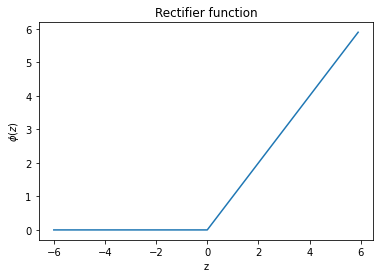

In [21]:
def rectifier(z):
    return np.maximum(0, z)

z = np.arange(-6, 6, 0.1)
phi_z = rectifier(z)
plt.plot(z, phi_z)
#plt.axvline(x=0.0, color='k', alpha=0.5)
#plt.axhline(y=0.0, color='k', alpha=0.5)
plt.title('Rectifier function')
plt.xlabel('z')
plt.ylabel(r'$\phi (z)$')
plt.show()

Applying this function to the output of a linear transformation yelds a nonlinear function. However, the function remains close to be linear, in the sense that it is a **piecewise linear function**.

Regarding the choice of the activation function, some properties are desirable:
- **Nonlinear**: using a nonlinear activation function, then a two-layer neural network can be proven to be a universal function approximator ([Universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)). The identity activation function $f(z)=z$ doesn't satisfy this property. When multiple layers use the identity activation function, then the entire network can be reduced to a single-layer model.
- **Continuously differentiable**: in order to enable gradient-based optimization methods. For example the binary step function (used by the Perceptron) is not differentiable at 0, so gradient methods can make no progress with it. The ReLU is also non-differentiable at 0, anyway it is differentiable anywhere else and the value of the derivative at zero can be arbitrarily chosen to be 0 or 1.
- **Monotonic**: when the activation function is monotonic, the error surface associated with a single-layer model is guaranteed to be convex.
- **Smooth functions with a monotonic derivative**: these have been shown to generalize better in some cases.
- **Approximates identity near the origin**: when activation functions have this property, the neural network will learn efficiently when its weights are initialized with small random values. When the activation function does not approximate identity near the origin, special care must be used when initializing the weights.

# Multi-layer networks
The term *network* comes to the fact that multiple functions are composed together in a model resulting into a directed acyclic graph. For example we may have 3 functions $f^{(1)}, f^{(2)}, f^{(3)}$ composed together in a chain to form $f(\mathbf{x}) = f^{(3)}\left( f^{(2)} \left( f^{(1)}(\mathbf{x})\right)\right)$. The i-th function is called the i-th **layer** and the length of the chain gives the **depth** of the model. The final layer is the **output layer**. The training data provides us noisy examples of $f^*(\mathbf{x})$ evaluated at different points. Those training examples specify what the output layer should produce for each input $\mathbf{x}$, anyway, they don't specify what the behavior of the intermediate layers should be. It is the task of the learning algorithm to regulate their behaviour. Because the training data doesn't show the desired output of each of these layers, they are called **hidden layers**. A layer can be thought either as a vector-to-vector function or as many units acting in parallel, each representing a vector-to-scalar function (a single neuron).

Linear models, such as linear regression or logistic regression can be fit efficiently, either in closed form or with convex optimization. Anyway, they have the defect to limit the model capacity to linear functions. In order to extend its capacity to nonlinear functions of $\mathbf{x}$, instead of applying the linear model to $\mathbf{x}$, we can apply it to a transformed input $\phi(\mathbf{x})$ where $\phi$ is a nonlinear function defining a hidden layer and providing a new representation of $\mathbf{x}$. In feedforward neural nets we have a model $y=f(x;\theta, w) = \phi(x;\theta)^\top w$ where the parameters $\theta$ are used to learn $\phi$ from a broad class of functions (that class has to be chosen and this is not trivial at all).

Similarly to linear models, the optimizer, the cost function and the form of the output units still still have to be chosen. Furthermore, since feedforward networks introduced the concept of hidden layers, we must also choose the activation functions that will be used to compute the weights of the hidden layers.

## Learning a XOR function
The truth table of the XOR function is:

| x1 | x2 | XOR |
|:--:|:--:|:---:|
|  0 |  0 |  0  |
|  0 |  1 |  1  |
|  1 |  0 |  1  |
|  1 |  1 |  0  |

We can treat this problem as a regression problem using the MSE as the loss function (in general, we should not use MSE as a cost function for modelling binary data, but prefer the logit function as we've seen in the chapter on logistic regression).

$$J(\theta) = \sum_{x\in \mathbb{X}}{\left(f^*(x) - f(x;\theta) \right)^2}$$

If we choose $f(x;\theta)$ to be a linear model $f(x;\theta) = \mathbf{w}^\top x + b$ with $\mathbf{w}\in \mathbb{R}^2$ and $b \in \mathbb{R}$, and solve the normal equations, we would end up with $\mathbf{w} = \mathbf{0}$ and $b=\frac{1}{2}$, that is a model that always predict $y = \frac{1}{2}$. We have to use a nonlinear model that is able to learn a different feature space in which a linear model can represent the solution.

Let's then introduce an intermediate layer containing two units resulting in a vector of hidden units $h$ that are computed by $h = f^{(1)}\left(x; W,c\right)$. The output layer will be a linear regression model $y = f^{(2)}\left(h, w, b\right)$, but acting on $h$ instead of $x$, a representation of the input in a new feature space. The entire network is represented by $y = f^{(2)}\left(f^{(1)}(x)\right)$ where $f^{(1)}$ has to be nonlinear, otherwise the network would result in a linear function of the input $x$, being unable to learn a XOR function.
